In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile

# zip_ref = zipfile.ZipFile('Sesuai Folder Drive', 'r')
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/SampahKu/Dataset/Dataset.zip', 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# base_dir = 'tmp/Dataset'
base_dir = 'tmp/DATASET'

In [ ]:
from pathlib import Path
import imghdr

In [ ]:
train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')

In [ ]:
image_extensions = ['.png', '.jpg']

img_type_accepted = ['jpeg', 'png', 'gif', 'bmp', 'jpg']
for filepath in Path(train_dir).rglob("*"):
  if filepath.suffix.lower() in image_extensions:
    img_type = imghdr.what(filepath)
    if img_type is None:
      print(f'{filepath} is not an image')
    elif img_type not in img_type_accepted:
      print(f'{filepath} is a {img_type}, not accepted by TensorFlow')

In [ ]:
image_extensions = ['.png', '.jpg']

img_type_accepted = ['jpeg', 'png', 'gif', 'bmp', 'jpg']
for filepath in Path(test_dir).rglob("*"):
  if filepath.suffix.lower() in image_extensions:
    img_type = imghdr.what(filepath)
    if img_type is None:
      print(f'{filepath} is not an image')
    elif img_type not in img_type_accepted:
      print(f'{filepath} is a {img_type}, not accepted by TensorFlow')

In [ ]:
o_train_dir = os.path.join(train_dir, 'O')
r_train_dir = os.path.join(train_dir, 'R')

In [ ]:
o_test_dir = os.path.join(test_dir, 'O')
r_test_dir = os.path.join(test_dir, 'R')

In [ ]:
print('total training Organik images:', len(os.listdir(o_train_dir)))
print('total training Anorganik images:', len(os.listdir(r_train_dir)))

total training Organik images: 12565
total training Anorganik images: 9999


In [ ]:
print('total testing Organik images:', len(os.listdir(o_test_dir)))
print('total testing Anorganik images:', len(os.listdir(r_test_dir)))

total testing Organik images: 1401
total testing Anorganik images: 1112


In [ ]:
o_train_files = os.listdir(o_train_dir)
print(o_train_files[:10])

r_train_files = os.listdir(r_train_dir)
print(r_train_files[:10])

['O_6073.jpg', 'O_5536.jpg', 'O_8824.jpg', 'O_6422.jpg', 'O_3536.jpg', 'O_1416.jpg', 'O_2865.jpg', 'O_5748.jpg', 'O_4617.jpg', 'O_11682.jpg']
['R_2281.jpg', 'R_598.jpg', 'R_3865.jpg', 'R_2033.jpg', 'R_8387.jpg', 'R_6519.jpg', 'R_3328.jpg', 'R_8496.jpg', 'R_3205.jpg', 'R_6390.jpg']


In [ ]:
o_test_files = os.listdir(o_test_dir)
print(o_test_files[:10])

r_test_files = os.listdir(r_test_dir)
print(r_test_files[:10])

['O_13884.jpg', 'O_13283.jpg', 'O_13311.jpg', 'O_13495.jpg', 'O_13561.jpg', 'O_12739.jpg', 'O_13095.jpg', 'O_13272.jpg', 'O_12707.jpg', 'O_12628.jpg']
['R_10346.jpg', 'R_10686.jpg', 'R_10195.jpg', 'R_10488.jpg', 'R_10892.jpg', 'R_10389.jpg', 'R_10796.jpg', 'R_10931.jpg', 'R_10774.jpg', 'R_10512.jpg']


In [ ]:
# prompt: buatkan x.train, x.test, y.train, y.test

import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have lists of filenames for each category (as shown in your code)
# o_train_files, r_train_files, o_test_files, r_test_files

# Create labels for organic and recyclable waste
o_train_labels = np.zeros(len(o_train_files))  # Organic (label 0)
r_train_labels = np.ones(len(r_train_files))   # Recyclable (label 1)
o_test_labels = np.zeros(len(o_test_files))    # Organic (label 0)
r_test_labels = np.ones(len(r_test_files))     # Recyclable (label 1)

# Combine file lists and labels for train and test datasets
x_train = np.concatenate([o_train_files, r_train_files])
y_train = np.concatenate([o_train_labels, r_train_labels])

x_test = np.concatenate([o_test_files, r_test_files])
y_test = np.concatenate([o_test_labels, r_test_labels])


# Now x_train, y_train, x_test, y_test are ready for use

# Example usage (optional): Split further for validation
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (22564,)
y_train shape: (22564,)
x_test shape: (2513,)
y_test shape: (2513,)


In [ ]:
NUM_CLASSES = 2
Sampahku_classes = ["O", "R"]

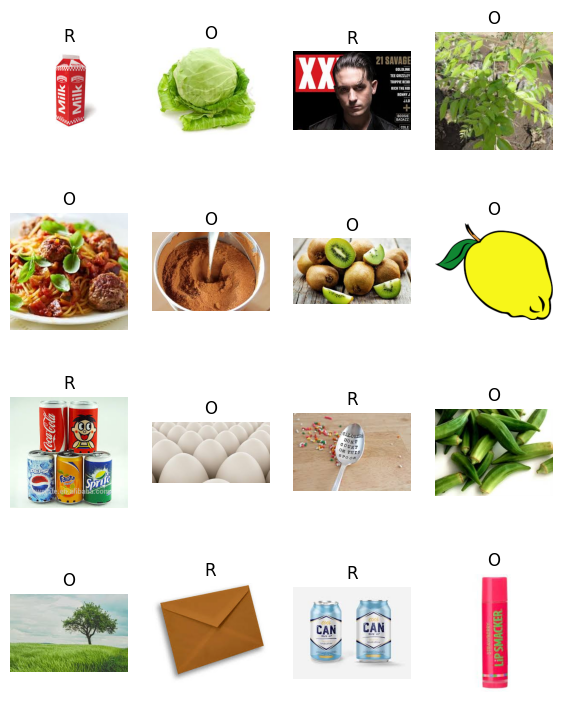

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

image_dir = 'tmp/DATASET/TRAIN/'  # Replace with the correct directory


def display_images(x_train, y_train, num_images=16):
    cols = 4
    rows = 4
    fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))

    random_indices = random.sample(range(len(x_train)), num_images)  # Select random images

    for i in range(rows):
        for j in range(cols):
            index = random_indices[i*cols + j]
            filename = x_train[index]
            label = Sampahku_classes[int(y_train[index])]

            # Construct the full image path
            img_path = os.path.join(image_dir, label, filename)

            try:
              img = mpimg.imread(img_path)
              ax = fig.add_subplot(rows, cols, i * cols + j + 1)
              ax.grid('off')
              ax.axis('off')
              ax.imshow(img)
              ax.set_title(label)
            except FileNotFoundError:
              print(f"Image file not found: {img_path}")
              ax = fig.add_subplot(rows, cols, i * cols + j + 1)
              ax.grid('off')
              ax.axis('off')
              ax.text(0.5, 0.5, "Image Not Found", ha='center', va='center')

    plt.show()


display_images(x_train, y_train)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout,LeakyReLU

def make_model():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model


In [ ]:
from keras.optimizers import Adam
from keras import metrics

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
BATCH_SIZE = 32

In [ ]:
from keras.utils import image_dataset_from_directory

train = image_dataset_from_directory(
    directory=train_dir,
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
)

val = image_dataset_from_directory(
    directory=test_dir,
    label_mode='categorical',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(224, 224),
    shuffle=False,
)

Found 22564 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.


In [ ]:
history = model.fit(
    train,
    validation_data=val,
    epochs=10,
    steps_per_epoch=50,
    validation_steps=5,
    verbose=2,
)

Epoch 1/10
50/50 - 107s - 2s/step - accuracy: 0.9137 - loss: 0.2053 - val_accuracy: 0.9875 - val_loss: 0.0842
Epoch 2/10
50/50 - 93s - 2s/step - accuracy: 0.9081 - loss: 0.1842 - val_accuracy: 0.9625 - val_loss: 0.0822
Epoch 3/10
50/50 - 92s - 2s/step - accuracy: 0.9306 - loss: 0.1443 - val_accuracy: 0.9875 - val_loss: 0.0282
Epoch 4/10
50/50 - 91s - 2s/step - accuracy: 0.9269 - loss: 0.1738 - val_accuracy: 0.9937 - val_loss: 0.0105
Epoch 5/10
50/50 - 92s - 2s/step - accuracy: 0.9162 - loss: 0.1683 - val_accuracy: 1.0000 - val_loss: 0.0150
Epoch 6/10
50/50 - 90s - 2s/step - accuracy: 0.9381 - loss: 0.1364 - val_accuracy: 0.9812 - val_loss: 0.0472
Epoch 7/10
50/50 - 92s - 2s/step - accuracy: 0.9087 - loss: 0.1645 - val_accuracy: 0.9625 - val_loss: 0.0421
Epoch 8/10
50/50 - 101s - 2s/step - accuracy: 0.9319 - loss: 0.1554 - val_accuracy: 0.9438 - val_loss: 0.1246
Epoch 9/10
50/50 - 92s - 2s/step - accuracy: 0.9219 - loss: 0.1798 - val_accuracy: 0.9312 - val_loss: 0.1452
Epoch 10/10
50/50

In [ ]:
predictions = model.predict(val)

79/79 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = np.argmax(predictions, axis=1)
y_true = np.concatenate([y for x, y in val], axis=0)
y_true = np.argmax(y_true, axis=1)

y_dict = {
    0: 'O',
    1: 'R',
}
y_pred = np.vectorize(y_dict.get)(y_pred)
y_true =np.vectorize(y_dict.get)(y_true)

cm = confusion_matrix(y_true, y_pred)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           O       0.86      0.98      0.91      1401
           R       0.96      0.79      0.87      1112

    accuracy                           0.89      2513
   macro avg       0.91      0.88      0.89      2513
weighted avg       0.90      0.89      0.89      2513



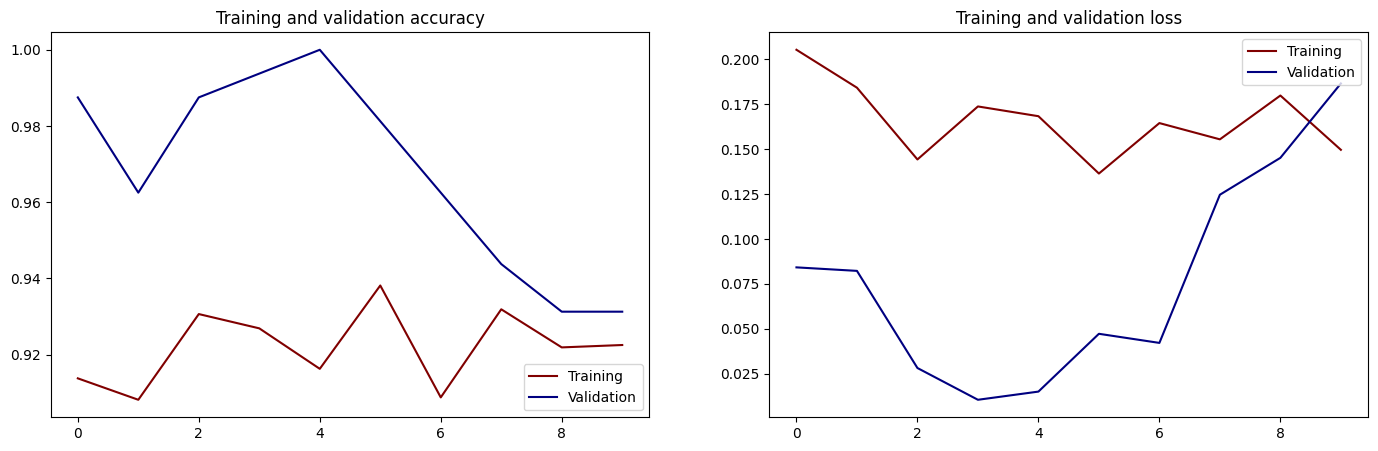

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_acc = range(len(acc))
epochs_loss = range(len(loss))

fig, (acc_fig, loss_fig) = plt.subplots(1, 2, figsize=(17, 5))

acc_fig.plot(epochs_acc, acc, '#800000', label='Training accuracy')
acc_fig.plot(epochs_acc, val_acc, '#000080', label='Validation accuracy')
acc_fig.set_title('Training and validation accuracy')
acc_fig.legend(["Training", "Validation"], loc ="lower right")

loss_fig.plot(epochs_loss, loss, '#800000', label='Training loss')
loss_fig.plot(epochs_loss, val_loss, '#000080', label='Validation loss')
loss_fig.set_title('Training and validation loss')
loss_fig.legend(["Training", "Validation"], loc ="upper right")

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  print(fn)

  print('O', '{:.5f}'.format(classes[0, 0]))
  print('R', '{:.5f}'.format(classes[0, 1]))

In [ ]:
model.save('SampahKu.keras')

In [ ]:
from tensorflow import keras

model_path = '/content/SampahKu.keras'
model = keras.models.load_model(model_path)

In [ ]:
from tensorflow import lite

converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('SampahKu_TFLiteModel.tflite', 'wb') as f:
  f.write(tflite_model)

label = ['O', 'R']

with open('label.txt', 'w') as f:
  f.write('\n'.join(label))

In [ ]:
model.save_weights("model_sampahku_tf.weights.h5") # Changed the filename to include the .weights.h5 extension

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
#                                      Activation, Dropout, LeakyReLU, RandomFlip, Rescaling)
# from tensorflow.keras.applications import MobileNet

# def make_model():
#     # Menggunakan MobileNet sebagai base_model
#     base_model = MobileNet(
#         weights='imagenet',
#         include_top=False,
#         input_shape=(224, 224, 3),
#     )
#     base_model.trainable = False  # Freeze base_model agar tidak ikut dilatih

#     # Membuat model Sequential
#     model = Sequential([
#         # Preprocessing Layer
#         Rescaling(1.0 / 255.0, input_shape=(224, 224, 3)),  # Normalisasi data
#         RandomFlip(mode='horizontal'),  # Augmentasi data (flip horizontal)

#         # Base Model
#         base_model,

#         # Fully Connected Layer
#         Flatten(),
#         Dense(32, activation='relu'),
#         Dropout(0.1),
#         Dense(2, activation='sigmoid'),
#     ])

#     return model
